<a href="https://colab.research.google.com/github/rosshalpin/AdvancedML/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/AdvancedML/

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/AdvancedML


In [2]:
import pandas as pd

df = pd.read_csv("tweets.1650309993.csv")

In [3]:
df.head()

,place,coords,created_at,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,text,sentiment
0,"Staines-upon-Thames, South East","51.42,-0.45",2022-04-18 19:13:49+00:00,False,0,0,0,0,16 and sexualising Lewis Hamilton on Twitter? ...,negative
1,"Soweto, South Africa","-26.26,27.88",2022-04-18 18:13:59+00:00,False,0,0,0,0,@MbalulaFikile Oh Lewis Hamilton just Fuck off,negative
2,"Wandsworth, London","51.45,-0.19",2022-04-18 17:29:09+00:00,False,0,0,1,0,@GeorgeRobbo_14 @thewallbank @JackBarber32 Lol...,neutral
3,"Aberdeen, Scotland","57.16,-2.13",2022-04-18 16:52:20+00:00,False,1,5,3,0,It's strange that @F1MikaHakkinen is never bor...,negative
4,"North East, England","55.13,-1.74",2022-04-18 12:49:12+00:00,False,0,0,0,0,#ctp_video #autoplay_video #Mercedes #LewisHam...,neutral


In [15]:
df.shape

(1500, 10)

In [16]:
pd.to_datetime(df.created_at)

0      2022-04-18 19:13:49+00:00
1      2022-04-18 18:13:59+00:00
2      2022-04-18 17:29:09+00:00
3      2022-04-18 16:52:20+00:00
4      2022-04-18 12:49:12+00:00
                  ...           
1495   2022-04-16 15:30:10+00:00
1496   2022-04-16 15:28:26+00:00
1497   2022-04-16 15:26:18+00:00
1498   2022-04-16 15:25:25+00:00
1499   2022-04-16 15:17:55+00:00
Name: created_at, Length: 1500, dtype: datetime64[ns, UTC]

In [17]:
df.sentiment.value_counts(normalize=True) * 100

neutral     57.066667
positive    21.933333
negative    21.000000
Name: sentiment, dtype: float64

In [21]:
df.place.value_counts()

Gênes, Ligurie                     11
Wallasey, England                   5
Passo Fundo, Brasil                 4
Johannesburg, South Africa          3
Kaduna, Nigeria                     2
Staines-upon-Thames, South East     1
Catane, Sicile                      1
South Shields, England              1
Austin, TX                          1
Melbourne, Victoria                 1
Brésil                              1
Nova Iguaçu, Brasil                 1
São Paulo, Brésil                   1
Jamaïque                            1
East Ham, London                    1
Stockholm, Suède                    1
Jacareí, Brasil                     1
Bari, Pouilles                      1
Budapest, Hongrie                   1
Latarnia                            1
Florida, USA                        1
मुंबई, भारत                         1
Pretoria, South Africa              1
Cairns, Queensland                  1
Northampton, England                1
Wales, United Kingdom               1
Kensington, 

In [4]:
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [74]:
df.head()

,place,coords,created_at,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,text,sentiment
0,"Staines-upon-Thames, South East","51.42,-0.45",2022-04-18 19:13:49+00:00,False,0,0,0,0,16 and sexualising Lewis Hamilton on Twitter? ...,negative
1,"Soweto, South Africa","-26.26,27.88",2022-04-18 18:13:59+00:00,False,0,0,0,0,@MbalulaFikile Oh Lewis Hamilton just Fuck off,negative
2,"Wandsworth, London","51.45,-0.19",2022-04-18 17:29:09+00:00,False,0,0,1,0,@GeorgeRobbo_14 @thewallbank @JackBarber32 Lol...,neutral
3,"Aberdeen, Scotland","57.16,-2.13",2022-04-18 16:52:20+00:00,False,1,5,3,0,It's strange that @F1MikaHakkinen is never bor...,negative
4,"North East, England","55.13,-1.74",2022-04-18 12:49:12+00:00,False,0,0,0,0,#ctp_video #autoplay_video #Mercedes #LewisHam...,neutral


In [5]:
df.text.sample(150)

1416    @formularacers_ Lewis Hamilton is literally a ...
615     2020 Topps Chrome F1 Lewis Hami #whodoyoucolle...
716     #Sports Lewis Hamilton backs Porsche despite M...
1168    Check out the comments on this post. You will ...
136     Yet my main priority is supporting Hamilton an...
                              ...                        
404     Former F1 driver Marc Surer acknowledges the t...
1247    #f1 : Hi my name is Erkan, im not new to f1 &a...
883            Lewis Hamilton &gt; Max Verstappen in 2021
344     If Leclerc wins the world championship will we...
1469    Lewis Hamilton is better than any other driver...
Name: text, Length: 150, dtype: object

In [136]:
df_sentiment = df.sentiment
df_text = df.text

In [23]:
df_sentiment

0       negative
1       negative
2        neutral
3       negative
4        neutral
          ...   
1495    positive
1496     neutral
1497     neutral
1498     neutral
1499    positive
Name: sentiment, Length: 1500, dtype: object

In [32]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create feature vectors
# vectorizer = TfidfVectorizer(min_df = 5,
#                              max_df = 0.8,
#                              sublinear_tf = True,
#                              use_idf = True)
# train_vectors = vectorizer.fit_transform(X_train)
# test_vectors = vectorizer.transform(X_test)

In [33]:
# import time
# from sklearn import svm
# from sklearn.metrics import classification_report
# # Perform classification with SVM, kernel=linear
# classifier_linear = svm.SVC(kernel='linear')
# t0 = time.time()
# classifier_linear.fit(train_vectors, y_train)
# t1 = time.time()
# prediction_linear = classifier_linear.predict(test_vectors)
# t2 = time.time()
# time_linear_train = t1-t0
# time_linear_predict = t2-t1
# # results
# print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
# report = classification_report(y_test, prediction_linear, output_dict=True)
# print('positive: ', report['positive'])
# print('negative: ', report['negative'])
# print('neutral: ', report['neutral'])

Training time: 0.698799s; Prediction time: 0.032552s
positive:  {'precision': 0.7222222222222222, 'recall': 0.37142857142857144, 'f1-score': 0.490566037735849, 'support': 35}
negative:  {'precision': 0.3181818181818182, 'recall': 0.2692307692307692, 'f1-score': 0.2916666666666667, 'support': 26}
neutral:  {'precision': 0.6909090909090909, 'recall': 0.8539325842696629, 'f1-score': 0.763819095477387, 'support': 89}


In [8]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

stemmer = SnowballStemmer("english")
tweet_tokenizer = TweetTokenizer()

def tokenize(input): 
    return tweet_tokenizer.tokenize(input)

def stemmer(input):
    return (stemmer.stem(word) for word in input)

In [ ]:
stemmer(df_text[0])

In [150]:
vectorizer = CountVectorizer(
    analyzer = 'char',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = set(stopwords.words("english")))

In [152]:
df_text = vectorizer.fit_transform(df.text)

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, ShuffleSplit


# kfolds = StratifiedKFold(n_splits=8, shuffle=True, random_state=1)
kfolds = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

parameters = {
  "C": [0.01, 0.1, 1],
  "kernel": ["linear"]
}

clf = GridSearchCV(SVC(),
                   param_grid = parameters, 
                   cv = kfolds,
                   n_jobs=-1) 

In [92]:
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import f1_score, make_scorer
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_text, df_sentiment, test_size=0.4, random_state=409, shuffle=True)
# kfolds = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

# pipeline_svm = make_pipeline(vectorizer, 
#                             SVC(kernel="linear"))

# clf = GridSearchCV(pipeline_svm,
#                     param_grid = {'svc__C': [0.01, 0.1, 1]}, 
#                     cv = kfolds,
#                     n_jobs=-1) 

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# from sklearn.metrics import classification_report

# result = classification_report(y_test, y_pred, output_dict=True)

# print('accuracy: ', result['accuracy'])
# print('macro avg: ', result['macro avg'])
# print('positive: ', result['positive'])
# print('negative: ', result['negative'])
# print('neutral ', result['neutral'])

accuracy:  0.6866666666666666
macro avg:  {'precision': 0.6364468864468864, 'recall': 0.6044614561468493, 'f1-score': 0.6152578808316513, 'support': 150}
positive:  {'precision': 0.7307692307692307, 'recall': 0.5428571428571428, 'f1-score': 0.6229508196721311, 'support': 35}
negative:  {'precision': 0.42857142857142855, 'recall': 0.46153846153846156, 'f1-score': 0.4444444444444445, 'support': 26}
neutral  {'precision': 0.75, 'recall': 0.8089887640449438, 'f1-score': 0.7783783783783783, 'support': 89}


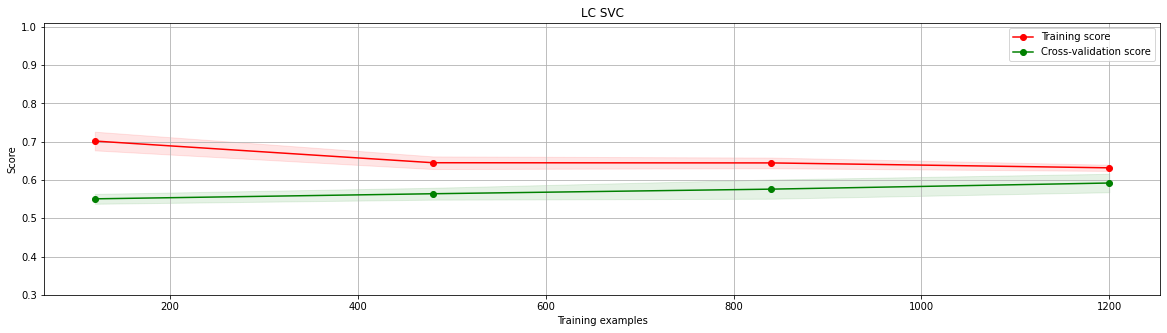

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 4),
):
    if axes is None:
        _, (ax) = plt.subplots(1, 1, figsize=(20, 5))

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    return plt


plot_learning_curve(
    clf, "LC SVC", X=df_text, y=df_sentiment,ylim=(0.3, 1.01), cv=kfolds, n_jobs=-1
)

plt.show()